In [1]:
import networkx as nx
import matplotlib
%matplotlib inline
import numpy as np
import copy
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import random
import time

from measuresFunctions import getMeasures, printMeasures, plotMeasures, plotDegreeDistribution
from metropolisHastings import iterMHBeta, plotMetropolisHastingsResult
from markov import TSwapEdges, TDeleteEdgeAddEdge

import pickle
def pickleSave(object, name, uri: str):

    #filename = uri + '/pkl/' + name + '.pkl'
    filename = name + '.pkl'
    with open(filename, mode='wb+') as fipkl:    
        pickle.dump(object, fipkl)

In [2]:
Gstart = nx.random_regular_graph(4, 300, seed=42)

In [3]:
result=iterMHBeta(1, [0], 10, Gstart, TDeleteEdgeAddEdge, 'testblob', 100, burnin=10)

Number of samples requested:  1
Number of accepted swaps between samples: 11
10 burning iterations at the start before taking any samples
Sample taken at time 5000 with Cnet =  0.0091 after 5000 accepted swaps (target accepted swaps before sampling = 5000).
# Rejected: 0
# Accepted: 5000
Proportion rejected: 0.0
testblob_burnin_0 saved as pkl file in testblob_burnin_0.pkl
--------------------------------------------------------------
                    Beta =  0
--------------------------------------------------------------
Sample taken at time 11 with Cnet =  0.0078 after 11 accepted swaps (target accepted swaps before sampling = 11).
# Rejected: 0
# Accepted: 11
Proportion rejected: 0.0
Number of nodes N:              300.0000  +/-  0.0000
Number of links L:              600.0000  +/-  0.0000
Average node degree <z>:        4.0000  +/-  0.0000
Deviation of degree sigma_z:    1.8129  +/-  0.0000
Degree variability sigma_z/<z>: 0.4532  +/-  0.0000
Number of components:           3.000

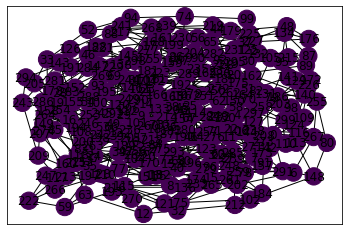

In [4]:
pos = nx.spring_layout(Gstart)
nx.draw_networkx(Gstart, node_color=[d for v, d in Gstart.degree()], pos=pos)

Number of nodes N:              300
Number of links L:              600
Average node degree <z>:        4.0000
Deviation of degree sigma_z:    0.0000
Degree variability sigma_z/<z>: 0.0000
Number of components:           1
Size of largest component:      300
Size of largest clique:         3
Distances are measured on the largest component:
Diameter :                      7.0000
<<d>>:                          4.5493
For multigraph Cnet and <C> is measured after transforming the graph into a simple graph
Multigraph: 1 - Yes, 0 - No     0
Cnet:                           0.0033
<C>:                            0.0033


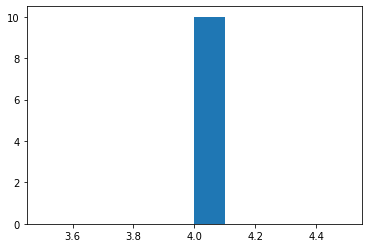

In [5]:
g=Gstart
deg_sequence =  [d for v, d in g.degree()]
plt.hist(deg_sequence,density=True, histtype='bar')

ms=getMeasures(Gstart)
printMeasures(ms)

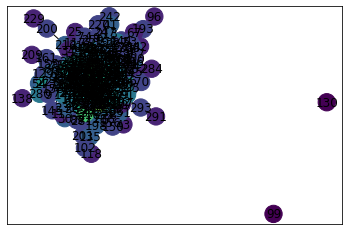

In [6]:
newg=result[0]['lastnet']
pos = nx.spring_layout(newg)
nx.draw_networkx(newg, node_color=[d for v, d in newg.degree()], pos=pos)

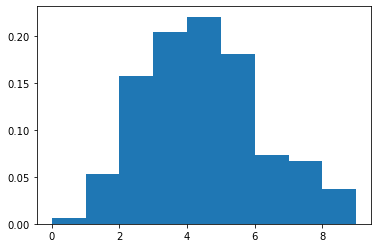

In [7]:
plotDegreeDistribution(newg)
plt.show()

In [8]:
msn=getMeasures(newg)
printMeasures(msn)

Number of nodes N:              300
Number of links L:              600
Average node degree <z>:        4.0000
Deviation of degree sigma_z:    1.8129
Degree variability sigma_z/<z>: 0.4532
Number of components:           3
Size of largest component:      298
Size of largest clique:         3
Distances are measured on the largest component:
Diameter :                      10.0000
<<d>>:                          4.2863
For multigraph Cnet and <C> is measured after transforming the graph into a simple graph
Multigraph: 1 - Yes, 0 - No     0
Cnet:                           0.0078
<C>:                            0.0102


In [ ]:
tic = time.perf_counter()

# initial conditions : burnin 500, transformation TDeleteEdgeAddEdge

number_of_samples=20
beta=[ *np.arange(0, 6000, 50),  *np.arange(6000, -50, -50)]
thinning=Gstart.number_of_edges()/2
maxiteration=thinning*10

picklename='KRegular_4_300_TDA'

result=iterMHBeta(number_of_samples, beta,  thinning, Gstart, TDeleteEdgeAddEdge, picklename, maxiteration)

toc = time.perf_counter()
print()
print("--------------------------------------------------------")
print("Metropolis hastings in {:.04f} seconds".format(toc-tic))
print("--------------------------------------------------------")

plotMetropolisHastingsResult(result, 'Cnet', beta)

pickleSave(beta, 'beta_' + picklename, '.')
pickleSave(result, 'result_' + picklename, '.' )

Number of samples requested:  20
Number of accepted swaps between samples: 301
5000 burning iterations at the start before taking any samples
Sample taken at time 5000 with Cnet =  0.0099 after 5000 accepted swaps (target accepted swaps before sampling = 5000).
# Rejected: 0
# Accepted: 5000
Proportion rejected: 0.0
KRegular_4_300_TDA_burnin_0 saved as pkl file in KRegular_4_300_TDA_burnin_0.pkl
--------------------------------------------------------------
                    Beta =  0
--------------------------------------------------------------
Sample taken at time 301 with Cnet =  0.0113 after 301 accepted swaps (target accepted swaps before sampling = 301).
Sample taken at time 602 with Cnet =  0.0124 after 301 accepted swaps (target accepted swaps before sampling = 301).
Sample taken at time 903 with Cnet =  0.0147 after 301 accepted swaps (target accepted swaps before sampling = 301).
Sample taken at time 1204 with Cnet =  0.0136 after 301 accepted swaps (target accepted swaps 

In [ ]:
#-------------------------------------------------------------------------------------------------------------------
#
#------------------------------------------------------------------------------------------------------------------
tic = time.perf_counter()

# initial conditions : burnin 500, transformation TDeleteEdgeAddEdge

number_of_samples=20
beta=[ *np.arange(0, 6000, 50),  *np.arange(6000, -50, -50)]
thinning=Gstart.number_of_edges()/2
maxiteration=thinning*10

picklename='KRegular_4_300_TDA'

result=iterMHBeta(number_of_samples, beta,  thinning, Gstart, TDeleteEdgeAddEdge, picklename, maxiteration)

toc = time.perf_counter()
print()
print("--------------------------------------------------------")
print("Metropolis hastings in {:.04f} seconds".format(toc-tic))
print("--------------------------------------------------------")

plotMetropolisHastingsResult(result, 'Cnet', beta)

pickleSave(beta, 'beta_' + picklename, '.')
pickleSave(result, 'result_' + picklename, '.' )

In [ ]:
beta=[ *np.arange(0, 6000, 50),  *np.arange(6000, -50, -50)]
print(beta)